# Problem Statement:

Ever wondered why insurance costs what it does? Let's crack the code! I'm on a mission to build a smart computer program that can predict how much people should pay for insurance. Think of it as a super-smart calculator, but for insurance charges.


# Objectives:

Create a robust machine learning model to accurately predict insurance charges, enabling the insurance company to streamline pricing strategies and offer competitive premiums.

## Importing Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split    # split the data for training & testing 

from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Importing the Dataset

data = pd.read_csv(r"C:\Users\vikas\Coding\ML\Projects\Insurance Price Prediction (Regression)\new_insurance_data.csv")

data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


# EDA


In [3]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
data.shape

(1338, 13)

In [5]:
data.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [7]:
data.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

# Treatment Of Null Values

In [9]:
data.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [10]:
col = list(data.columns)

col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [11]:
for i in col:
    if data[i].dtype == "object":
        data[i] = data[i].fillna(data[i].mode()[0])
    else:
        data[i] = data[i].fillna(data[i].mean())
        

In [12]:
data.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [13]:
data.shape

(1338, 13)

# Checking Outliers

In [14]:
col_name = list(data.columns)
col_name

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

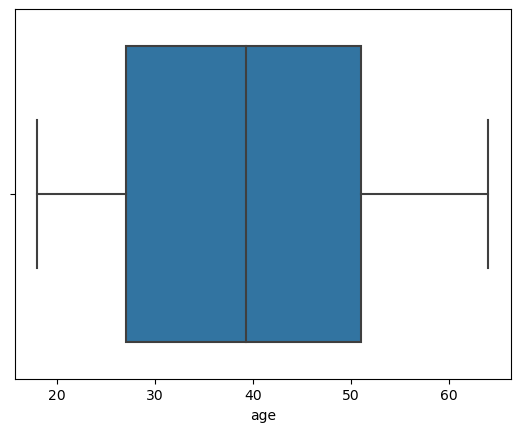

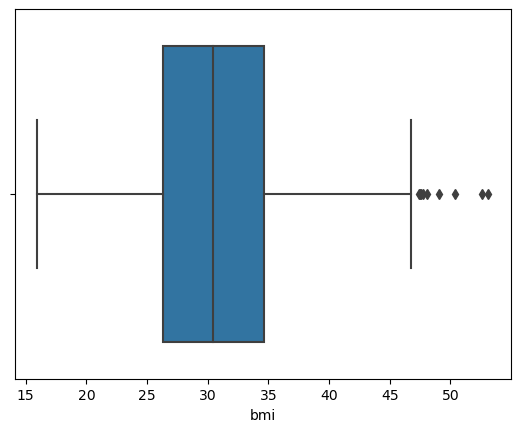

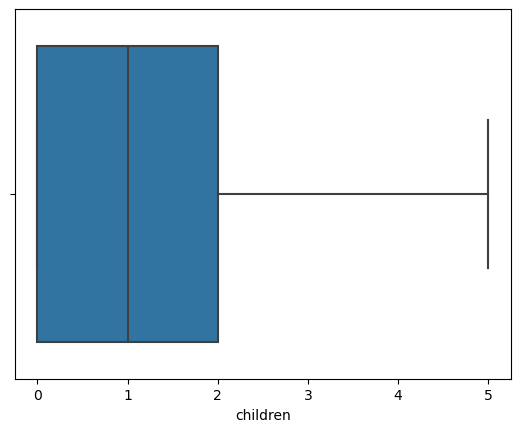

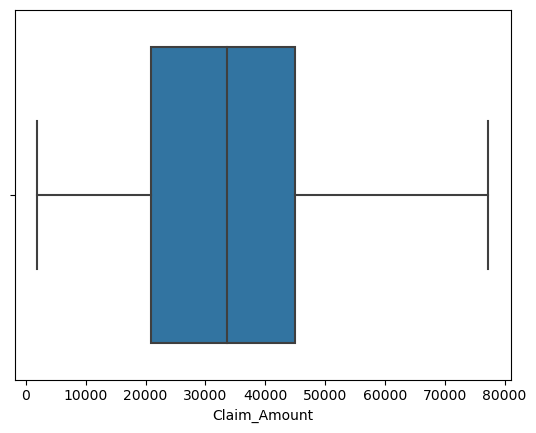

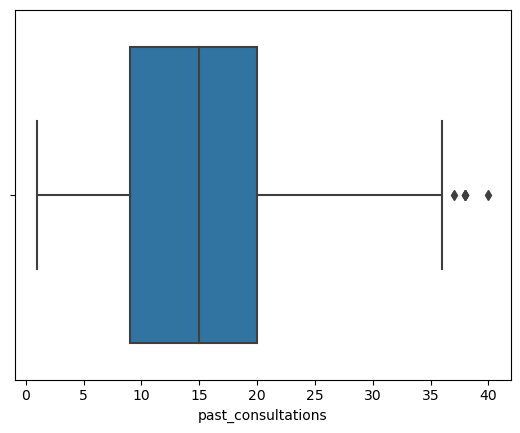

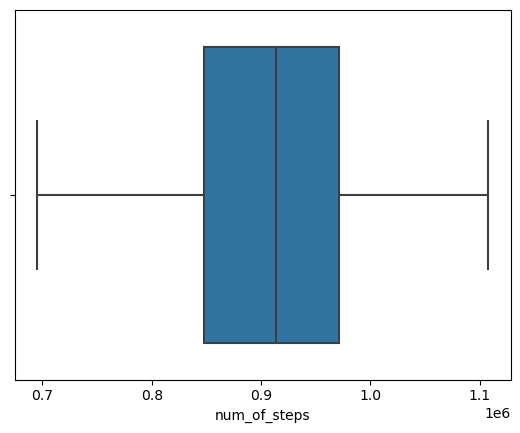

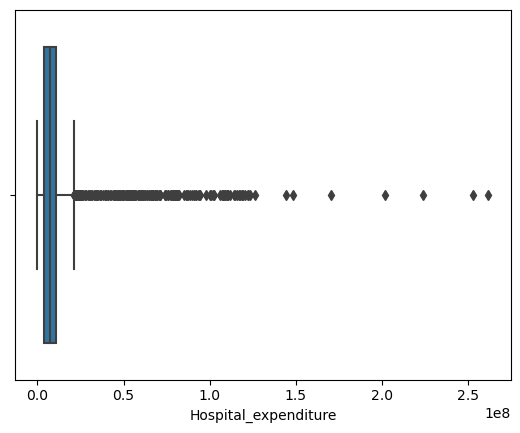

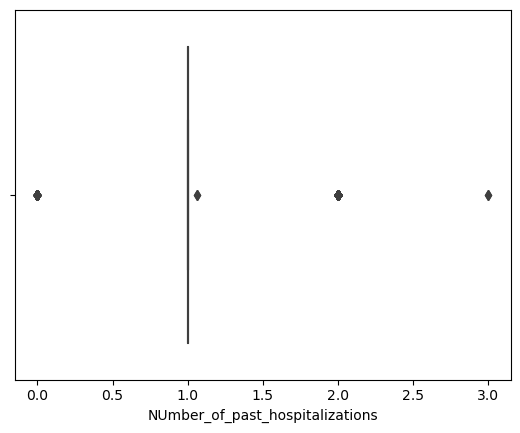

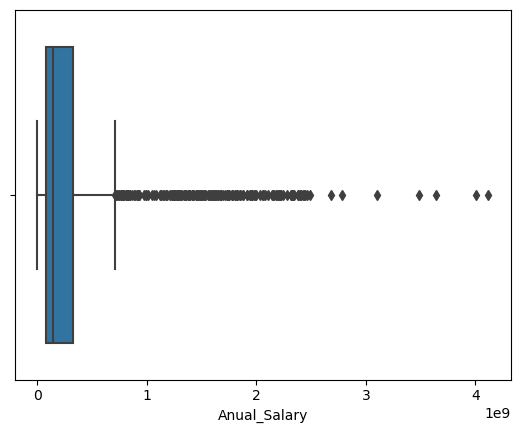

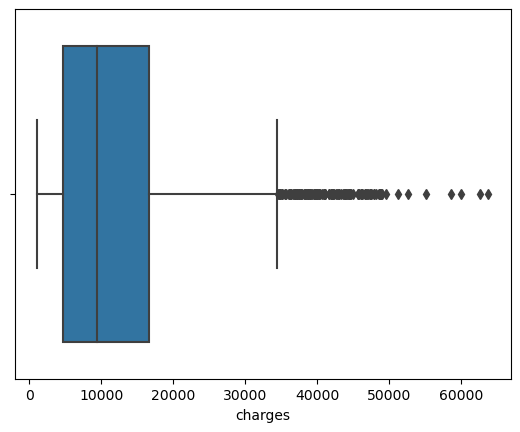

In [15]:
for i in col_name:
    if data[i].dtypes != "object":
        plt.figure()
        sns.boxplot(x=data[i])
        

# Treatment of Outliers

In [16]:
data.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [17]:
numeric_columns = data.select_dtypes(include='float64')

numeric_columns.head()


,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,1121.8739
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,1131.5066
2,18.0,33.33,0.0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,1135.9407
3,18.0,33.66,0.0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,1136.3994
4,18.0,34.10,0.0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,1137.0110


In [18]:
Q1 = numeric_columns.quantile(0.25)

Q3 = numeric_columns.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

age                                2.400000e+01
bmi                                8.341250e+00
children                           2.000000e+00
Claim_Amount                       2.403123e+04
past_consultations                 1.100000e+01
num_of_steps                       1.240202e+05
Hospital_expenditure               6.816929e+06
NUmber_of_past_hospitalizations    0.000000e+00
Anual_Salary                       2.523204e+08
charges                            1.189963e+04
dtype: float64


In [20]:
# Formula for removing Outliers using IQR:

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
data_no_outliers = numeric_columns[(numeric_columns >= lower_bound) & (numeric_columns <= upper_bound)]

data_no_outliers.head()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4720920.992,NaN,55784970.05,1121.8739
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4329831.676,NaN,13700885.19,1131.5066
2,18.0,33.33,0.0,39023.62759,19.0,702341.0,6884860.774,NaN,73523107.27,1135.9407
3,18.0,33.66,0.0,28185.39332,11.0,700250.0,4274773.550,NaN,75819679.60,1136.3994
4,18.0,34.10,0.0,14697.85941,16.0,711584.0,3787293.921,NaN,23012320.01,1137.0110


In [22]:
data_no_outliers = data_no_outliers.drop("NUmber_of_past_hospitalizations", axis = 1)

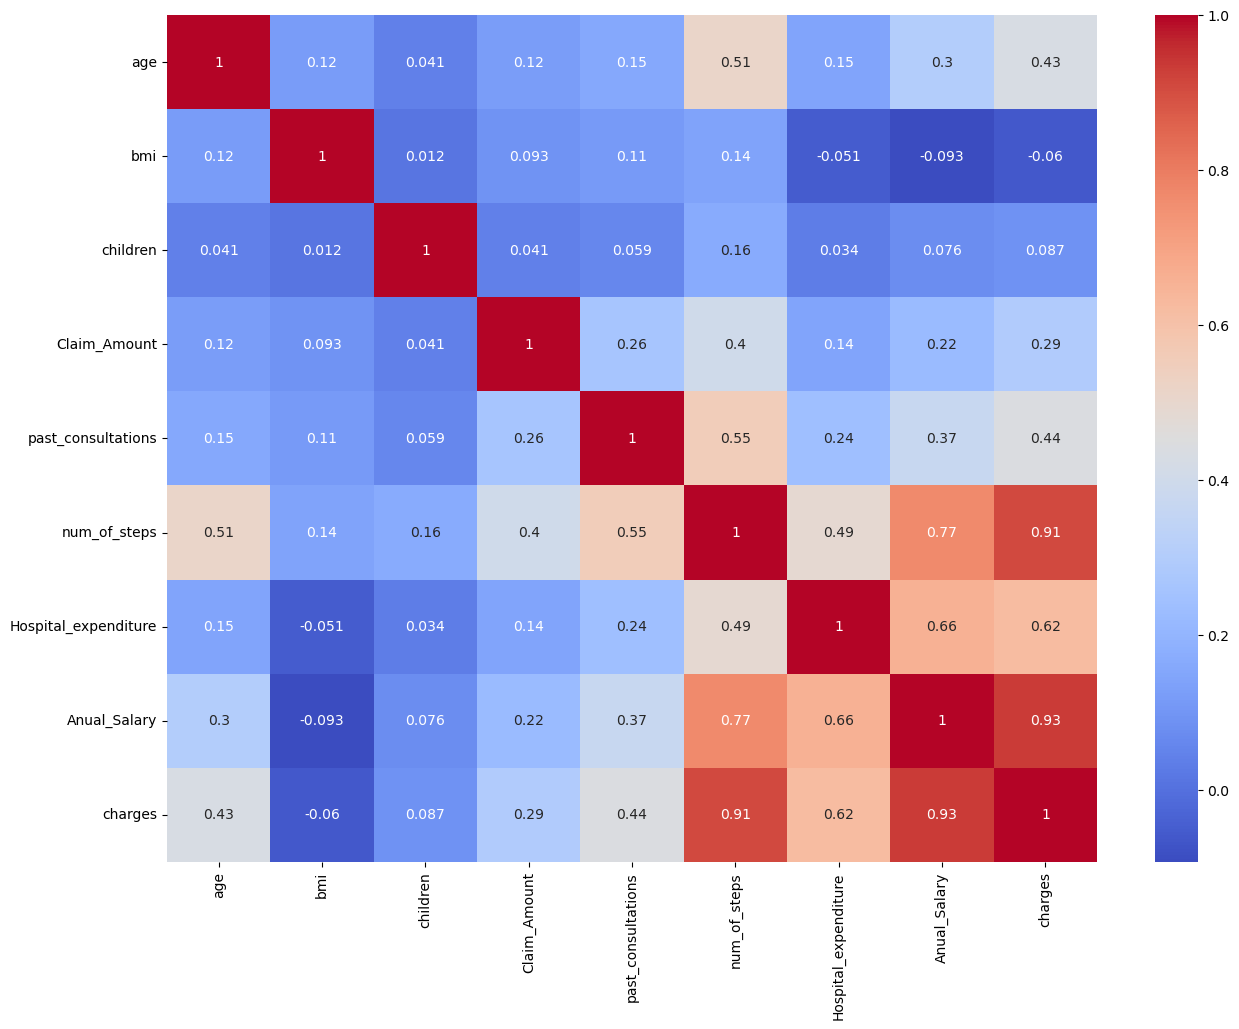

In [23]:
# Making Heat map for seeing the correlation

plt.figure(figsize = (15,11))
sns.heatmap(data_no_outliers.corr(),annot=True,cmap='coolwarm')
plt.show()

# VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,12.806382
1,bmi,28.316082
2,children,1.953101
3,Claim_Amount,6.938788
4,past_consultations,8.549723
5,num_of_steps,62.355848
6,Hospital_expenditure,21.311452
7,NUmber_of_past_hospitalizations,17.934493
8,Anual_Salary,59.339265
9,charges,45.714083


In [25]:
# Highest VIF: 62.35, so drop this column

numeric_columns = numeric_columns.drop(["num_of_steps"], axis = 1)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,11.486691
1,bmi,12.297591
2,children,1.934834
3,Claim_Amount,6.458169
4,past_consultations,7.922982
5,Hospital_expenditure,21.307579
6,NUmber_of_past_hospitalizations,16.597097
7,Anual_Salary,57.753195
8,charges,44.046514


In [27]:
# Highest VIF: 57.75, so drop this column

numeric_columns = numeric_columns.drop(["Anual_Salary"], axis = 1)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,10.067095
1,bmi,12.293774
2,children,1.930930
3,Claim_Amount,6.436030
4,past_consultations,7.904848
5,Hospital_expenditure,6.421703
6,NUmber_of_past_hospitalizations,16.580772
7,charges,19.295900


In [29]:
# Highest VIF: 19.29, so drop this column

numeric_columns = numeric_columns.drop(["charges"], axis = 1)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,9.911802
1,bmi,11.146550
2,children,1.918421
3,Claim_Amount,6.360830
4,past_consultations,7.338981
5,Hospital_expenditure,2.551578
6,NUmber_of_past_hospitalizations,11.057620


In [30]:
# Highest VIF: 11.14, so drop this column

numeric_columns = numeric_columns.drop(["bmi"], axis = 1)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,7.510410
1,children,1.891269
2,Claim_Amount,5.659160
3,past_consultations,6.709812
4,Hospital_expenditure,2.521156
5,NUmber_of_past_hospitalizations,11.038515


In [32]:
# Highest VIF: 11.03, so drop this column

numeric_columns = numeric_columns.drop(["NUmber_of_past_hospitalizations"], axis = 1)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns   # Adding a column, which will contain all the column names

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,5.810092
1,children,1.783877
2,Claim_Amount,5.350400
3,past_consultations,6.291554
4,Hospital_expenditure,1.889508


In [34]:
# Now all the VIF values are less than 6, so we can split our data and train & test it

In [35]:
feature = list(vif_data.feature)

feature

['age',
 'children',
 'Claim_Amount',
 'past_consultations',
 'Hospital_expenditure']

In [36]:
# Fetching all the values of independent columns 

indep = numeric_columns[feature]

indep

,age,children,Claim_Amount,past_consultations,Hospital_expenditure
0,18.0,0.0,29087.54313,17.0,4.720921e+06
1,18.0,0.0,39053.67437,7.0,4.329832e+06
2,18.0,0.0,39023.62759,19.0,6.884861e+06
3,18.0,0.0,28185.39332,11.0,4.274774e+06
4,18.0,0.0,14697.85941,16.0,3.787294e+06
...,...,...,...,...,...
1333,33.0,0.0,63142.25346,32.0,1.703805e+08
1334,31.0,1.0,43419.95227,31.0,2.015152e+08
1335,52.0,3.0,52458.92353,25.0,2.236450e+08
1336,45.0,0.0,69927.51664,34.0,2.528924e+08


In [37]:
# Fetching the values dependent column

dep = data["charges"]

dep

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1333    55135.40209
1334    58571.07448
1335    60021.39897
1336    62592.87309
1337    63770.42801
Name: charges, Length: 1338, dtype: float64

# Feature Scaling:

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(indep)
data_scaled = pd.DataFrame(scaled_features, columns=indep.columns)

In [39]:
data_scaled.head()

,age,children,Claim_Amount,past_consultations,Hospital_expenditure
0,-1.524073,-0.909616,-0.275204,0.239493,-0.417401
1,-1.524073,-0.909616,0.366551,-1.103120,-0.432080
2,-1.524073,-0.909616,0.364616,0.508016,-0.336182
3,-1.524073,-0.909616,-0.333297,-0.566075,-0.434146
4,-1.524073,-0.909616,-1.201807,0.105232,-0.452443


# Model Building

## 1. Linear Regression:

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.2, random_state=42)


linear_model = LinearRegression()


linear_model.fit(X_train, y_train)


y_pred = linear_model.predict(X_test)

## Model Evaluation

In [43]:
r2 = r2_score(y_test, y_pred)
mae_linear = mean_absolute_error(y_test, y_pred)
rmse_linear = mean_squared_error(y_test, y_pred, squared=False)


print(f'MAE: {mae_linear}')
print(f'RMSE: {rmse_linear}')
print(f'R-squared: {r2}')

MAE: 3872.086520596586
RMSE: 4842.192709463499
R-squared: 0.8533346886035333


# Regularization

## Ridge Regression:

In [44]:
from sklearn.linear_model import Ridge


ridge_model = Ridge()


ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


## Model Evaluation¶

In [45]:
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)


print(f'MAE: {mae_ridge}')
print(f'RMSE: {rmse_ridge}')
print(f'R-squared: {r2_ridge}')

MAE: 3872.044404125127
RMSE: 4842.14317326716
R-squared: 0.8533376893946771


## Lasso Regression:


In [46]:
from sklearn.linear_model import Lasso


lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

## Model Evaluation

In [47]:
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)


print(f'MAE: {mae_lasso}')
print(f'RMSE: {rmse_lasso}')
print(f'R-squared: {r2_lasso}')

MAE: 3871.981090957408
RMSE: 4842.0619616902195
R-squared: 0.8533426089425772


## 2. Decision Tree Regression:

In [48]:
from sklearn.tree import DecisionTreeRegressor


tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

## Model Evaluation

In [49]:

# Evaluate the model
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)


print(f'MAE: {mae_tree}')
print(f'RMSE: {rmse_tree}')
print(f'R-squared: {r2_tree}')

MAE: 1522.9002082462687
RMSE: 3315.714348758033
R-squared: 0.9312302434236962


## 3. Random Forest Regression:

In [50]:
from sklearn.ensemble import RandomForestRegressor


forest_model = RandomForestRegressor()

forest_model.fit(X_train, y_train)


y_pred_forest = forest_model.predict(X_test)


## Model Evaluation

In [51]:
r2_forest = r2_score(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)


print(f'MAE: {mae_forest}')
print(f'RMSE: {rmse_forest}')
print(f'R-squared: {r2_forest}')

MAE: 1410.7739736248132
RMSE: 2977.911961810981
R-squared: 0.9445288744453957


## Extracting Feature Importance from the best model: 

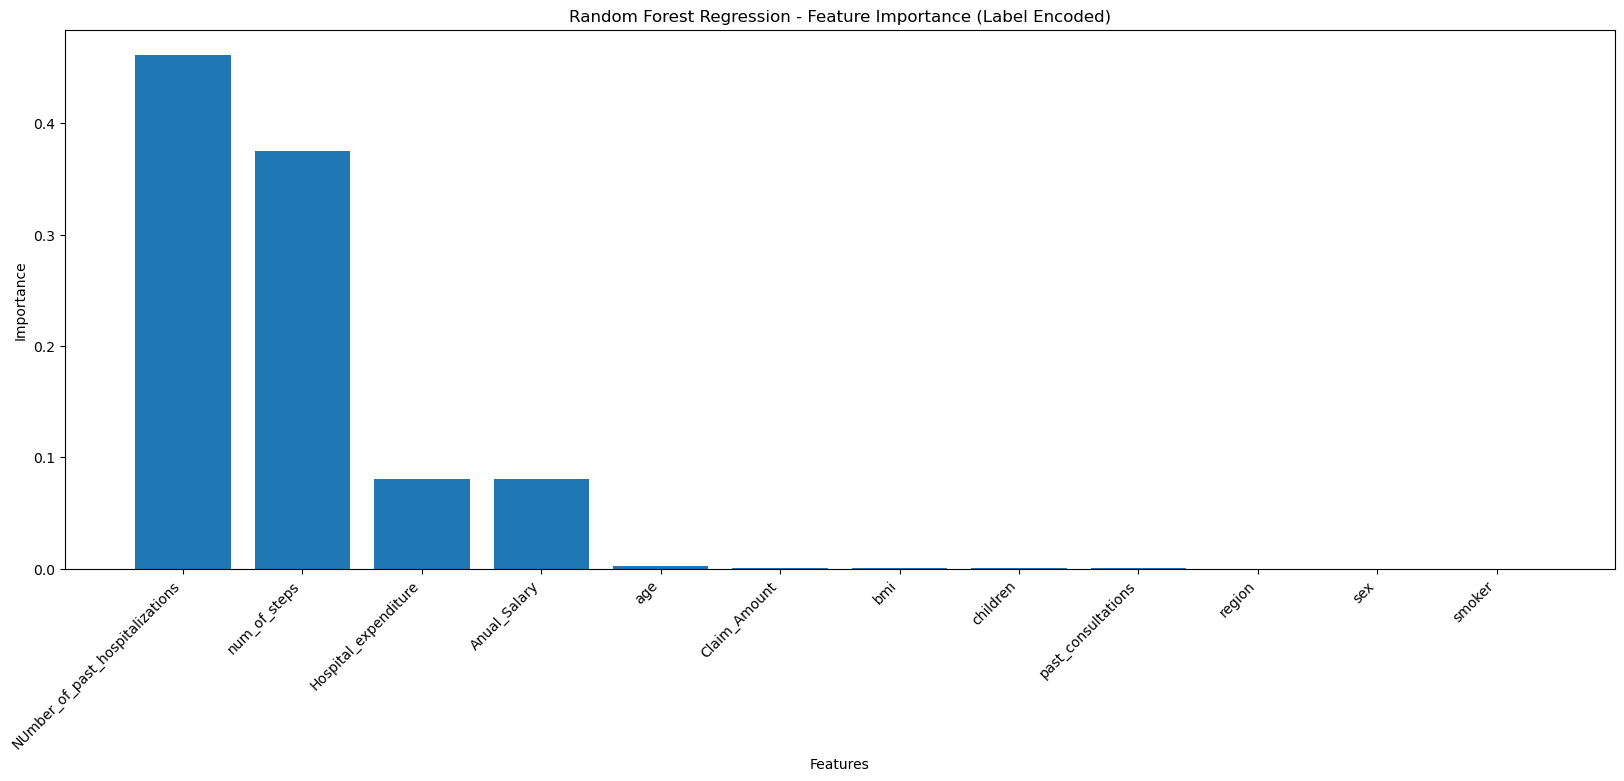

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

y = data['charges']
data = data.drop("charges", axis=1)
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


X_label_encoded = data.copy()

label_encoder = LabelEncoder()
for col in categorical_columns:
    X_label_encoded[col] = label_encoder.fit_transform(data[col])


rf_model = RandomForestRegressor()
rf_model.fit(X_label_encoded, y)
feature_importance = rf_model.feature_importances_


feature_names_encoded = X_label_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names_encoded, 'Importance': feature_importance})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 7))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Regression - Feature Importance (Label Encoded)')
plt.xticks(rotation=45, ha='right')
plt.show()


# Conclusion:

### Algorithms Used :


In this project we have used Linear Regression, Decision Trees and Random Forest. We also added Regularization Techniques to check the performance of the models

## Final Model Algorithm :

Among the models that we tried building, Random Forest performed the best in terms of R Square, where approximately 94.59% of the variability in the insurance "charges" can be explained by the independent features.